In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

Load the dataset

In [ ]:
df = pd.read_csv('/content/vertebrate.csv')

In [ ]:
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [ ]:
df['Class']= df['Class'].replace({'reptiles','fishes','birds','amphibians'},'non-mammals')

In [ ]:
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [ ]:
pd.crosstab(df['Warm-blooded'], df['Gives Birth'], values=df['Class'], aggfunc='count')

Gives Birth,0,1
Warm-blooded,,
0,7,1
1,2,5


In [ ]:
features = df.columns[:-1]
X = df[features]
y = df['Class']

In [ ]:
#split data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [ ]:
# Initialize the Decision Tree Classifier

clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)


In [ ]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Name'], dtype='object')


In [ ]:
X_train = X_train.drop(columns=non_numeric_cols)


In [ ]:
X_test = X_test.drop(columns=non_numeric_cols)


In [ ]:
clf = clf.fit(X_train, y_train)

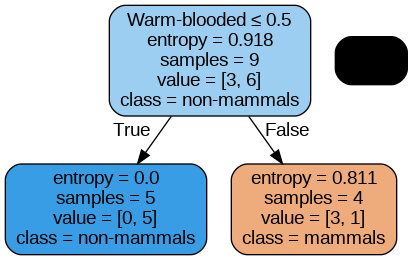

In [ ]:
features = X_train.columns

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features,
                                class_names=clf.classes_,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Screenshots using Dtree

Loading the data from vertebrate.csv;

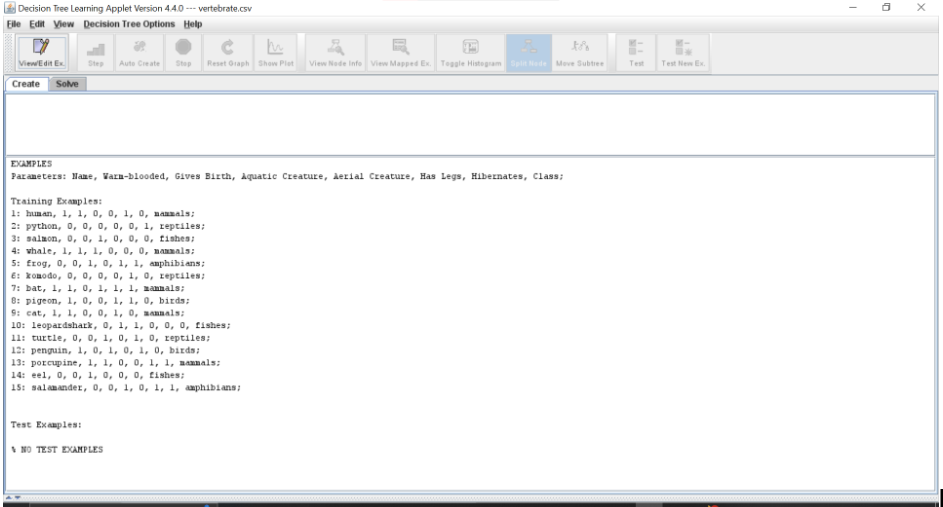


Loading the training data into the dtree application then splitting into various nodes

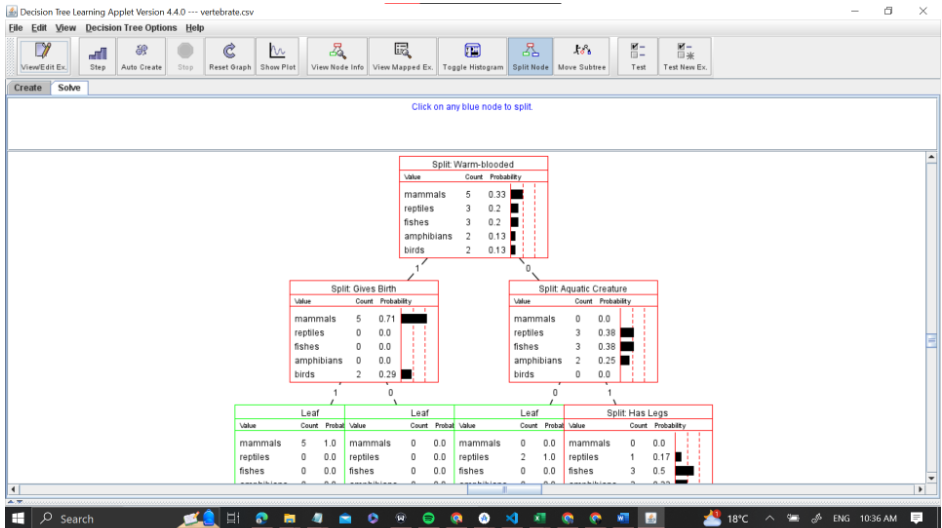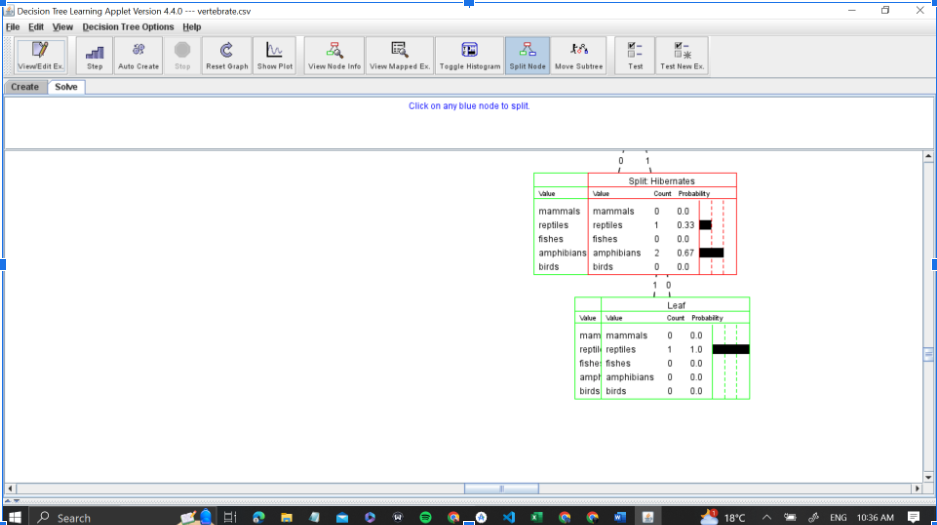







Splitting 80% training 20% testing
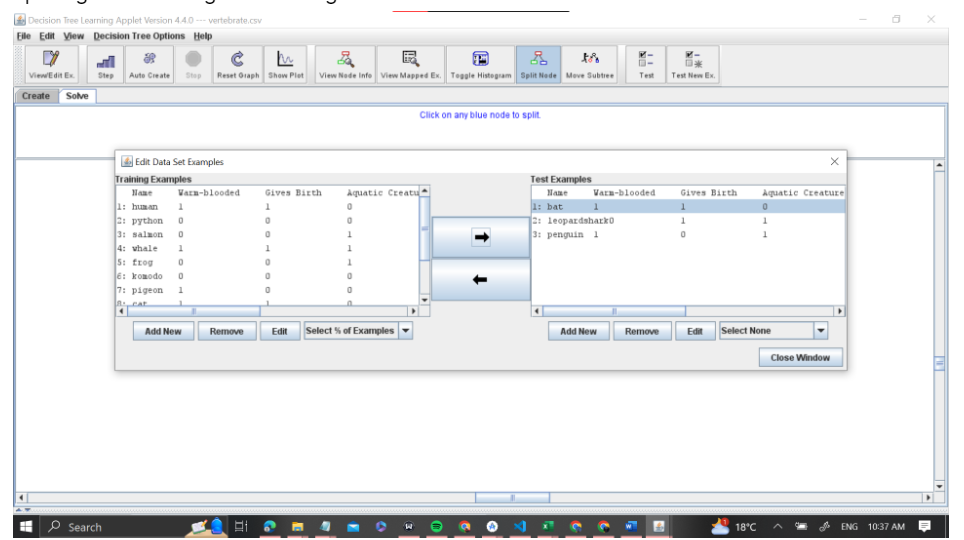


Split data 80% training 20% testing


After splitting:

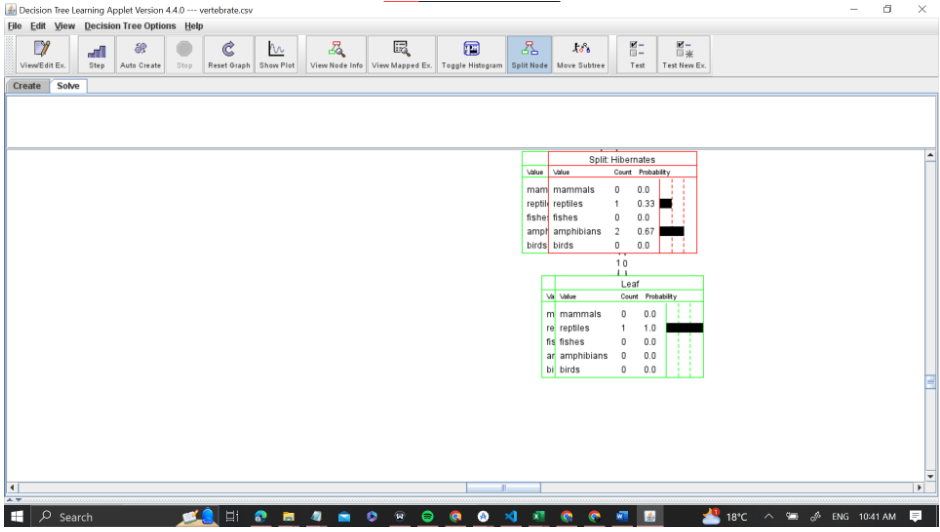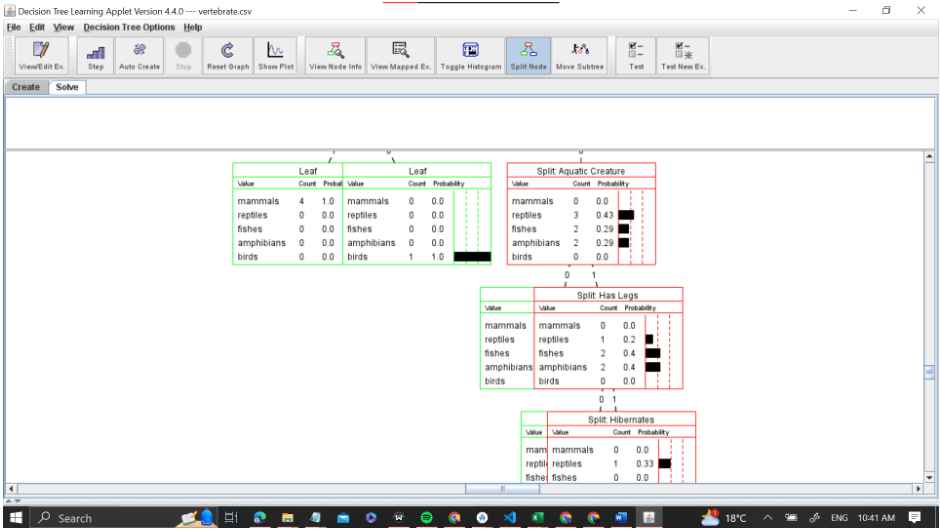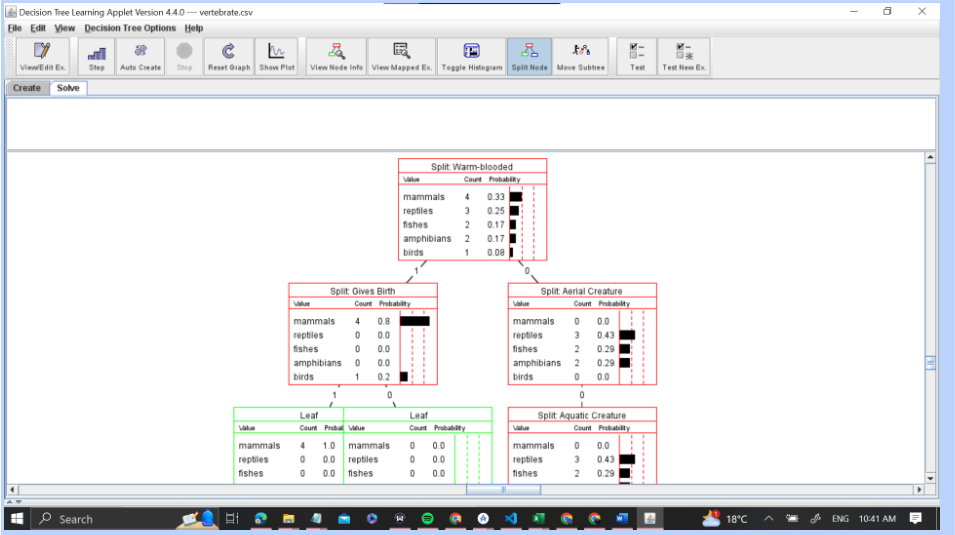








correct predictions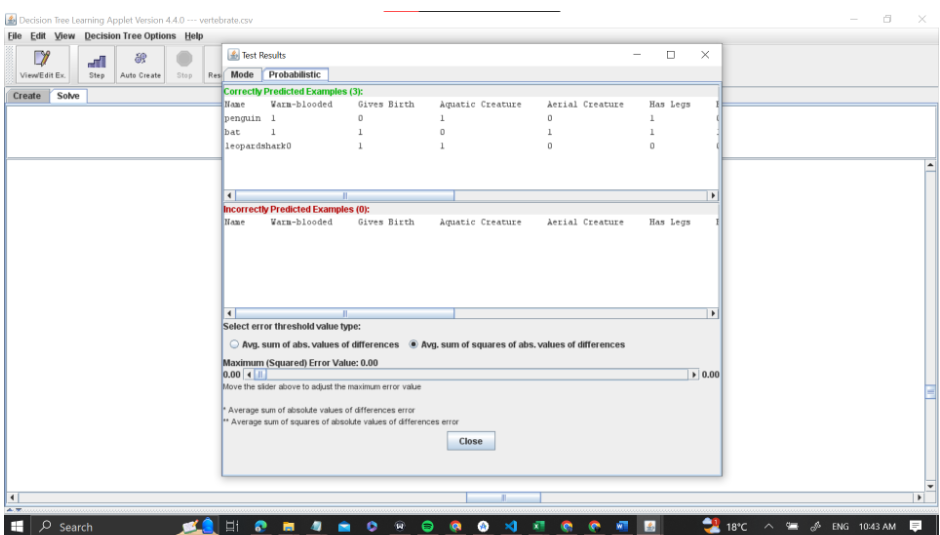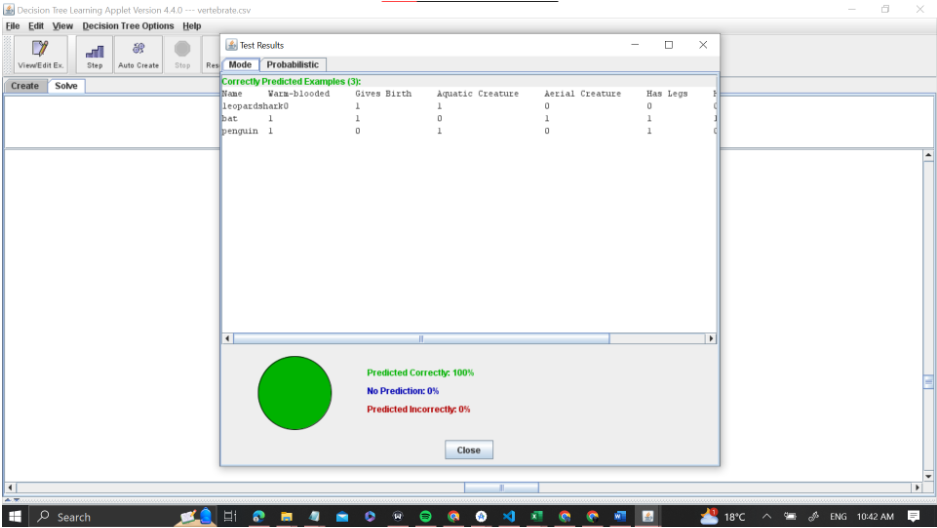
